# Data Generation

- enter the parameters for an ideal gaussian to test against
- generate 9 more gaussians that lie within the defined bounds
- add each gaussian to a dictionary, generate a dataframe, and save as pickle

In [28]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants

BINS = 16 # Number of EDH bins
RES = 1000 # Resolution of the laser (acts as x & y bounds in this sim)
X_RANGE = np.arange(RES) # x axis np array
SAMPLES = 10 # Number of samples to output to the dataframe

BASE_H = 600.0 # (Height) Peak height
BASE_D = 517.0 # (Depth) Peak offset (x-offset)
BASE_W = 43.0 # (Width) Peak width
BASE_O = 44.0 # (Offset) Ambient light offset (y-offset)

H_RANGE = (50.0, 900.0)
D_RANGE = (50.0, 950.0)
W_RANGE = (10.0, 50.0)
O_RANGE = (10.0, 100.0)

In [32]:
# Functions

# generic gaussian func
def gen_gauss(x, h, d, w, o):
    return h * np.exp(-(x - d)**2 / (2 * w**2)) + o

# returns edh bin boundaries
def oracle_edh(tr, n_edh):
    bins = tr.shape[-1]
    tr_cs = np.cumsum(tr)
    tr_sum = np.sum(tr)
    edh_bins = np.zeros((n_edh-1))
    for idx in range(edh_bins.shape[-1]):
        edh_bins[idx] = np.argmin(np.abs(tr_cs - tr_sum*(idx+1.0)/n_edh))
    return edh_bins+1

# returns a dictionary with the necessary data from the gaussian
def save_gauss_params(h, d, w, o):
    gauss = gen_gauss(X_RANGE, h, d, w, o)
    return {
        'height': h,
        'depth': d,
        'width': w,
        'ambient': o,
        'edh_bds': oracle_edh(gauss, BINS),
        'data_pts': gauss
    }

In [17]:
# save stuff

RNG = np.random.default_rng()

data = []
data.append(save_gauss_params(BASE_H, BASE_D, BASE_W, BASE_O))
for i in range(SAMPLES-1):
    rand_h = RNG.uniform(low=H_RANGE[0], high=H_RANGE[1])
    rand_d = RNG.uniform(low=D_RANGE[0], high=D_RANGE[1])
    rand_w = RNG.uniform(low=W_RANGE[0], high=W_RANGE[1])
    rand_o = RNG.uniform(low=O_RANGE[0], high=O_RANGE[1])
    data.append(save_gauss_params(rand_h, rand_d, rand_w, rand_o))
df = pd.DataFrame(data)
df.to_pickle('data/ground-truth.pkl')

df

,height,depth,width,ambient,edh_bds,data_pts
0,600.000000,517.000000,43.000000,44.000000,"[154.0, 309.0, 431.0, 464.0, 481.0, 494.0, 506...","[44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44...."
1,385.366094,90.007053,45.653257,40.221039,"[35.0, 54.0, 69.0, 81.0, 94.0, 106.0, 120.0, 1...","[95.40741545047702, 97.82902646236624, 100.328..."
2,502.622256,628.532671,32.509884,39.229067,"[128.0, 256.0, 383.0, 511.0, 578.0, 597.0, 609...","[39.22906720168481, 39.22906720168481, 39.2290..."
3,359.194015,561.814957,22.757273,12.219687,"[167.0, 335.0, 498.0, 531.0, 541.0, 548.0, 555...","[12.219686759764077, 12.219686759764077, 12.21..."
4,684.977421,652.366249,19.352143,35.559863,"[121.0, 242.0, 363.0, 484.0, 601.0, 628.0, 638...","[35.5598625317907, 35.5598625317907, 35.559862..."
5,694.635960,423.835606,42.815437,42.948558,"[171.0, 325.0, 366.0, 384.0, 397.0, 408.0, 419...","[42.948558388715696, 42.948558388715696, 42.94..."
6,356.309613,735.705845,40.749584,11.008165,"[269.0, 538.0, 666.0, 688.0, 701.0, 712.0, 721...","[11.008164649090102, 11.008164649090102, 11.00..."
7,370.842752,663.841074,46.434793,49.884241,"[117.0, 233.0, 350.0, 466.0, 567.0, 607.0, 628...","[49.884241402479894, 49.884241402479894, 49.88..."
8,671.881313,510.938908,15.965877,44.207470,"[101.0, 201.0, 302.0, 402.0, 482.0, 497.0, 504...","[44.207469753457985, 44.207469753457985, 44.20..."
9,245.968364,634.673195,24.475627,23.754424,"[102.0, 204.0, 307.0, 409.0, 511.0, 591.0, 611...","[23.754424399155454, 23.754424399155454, 23.75..."


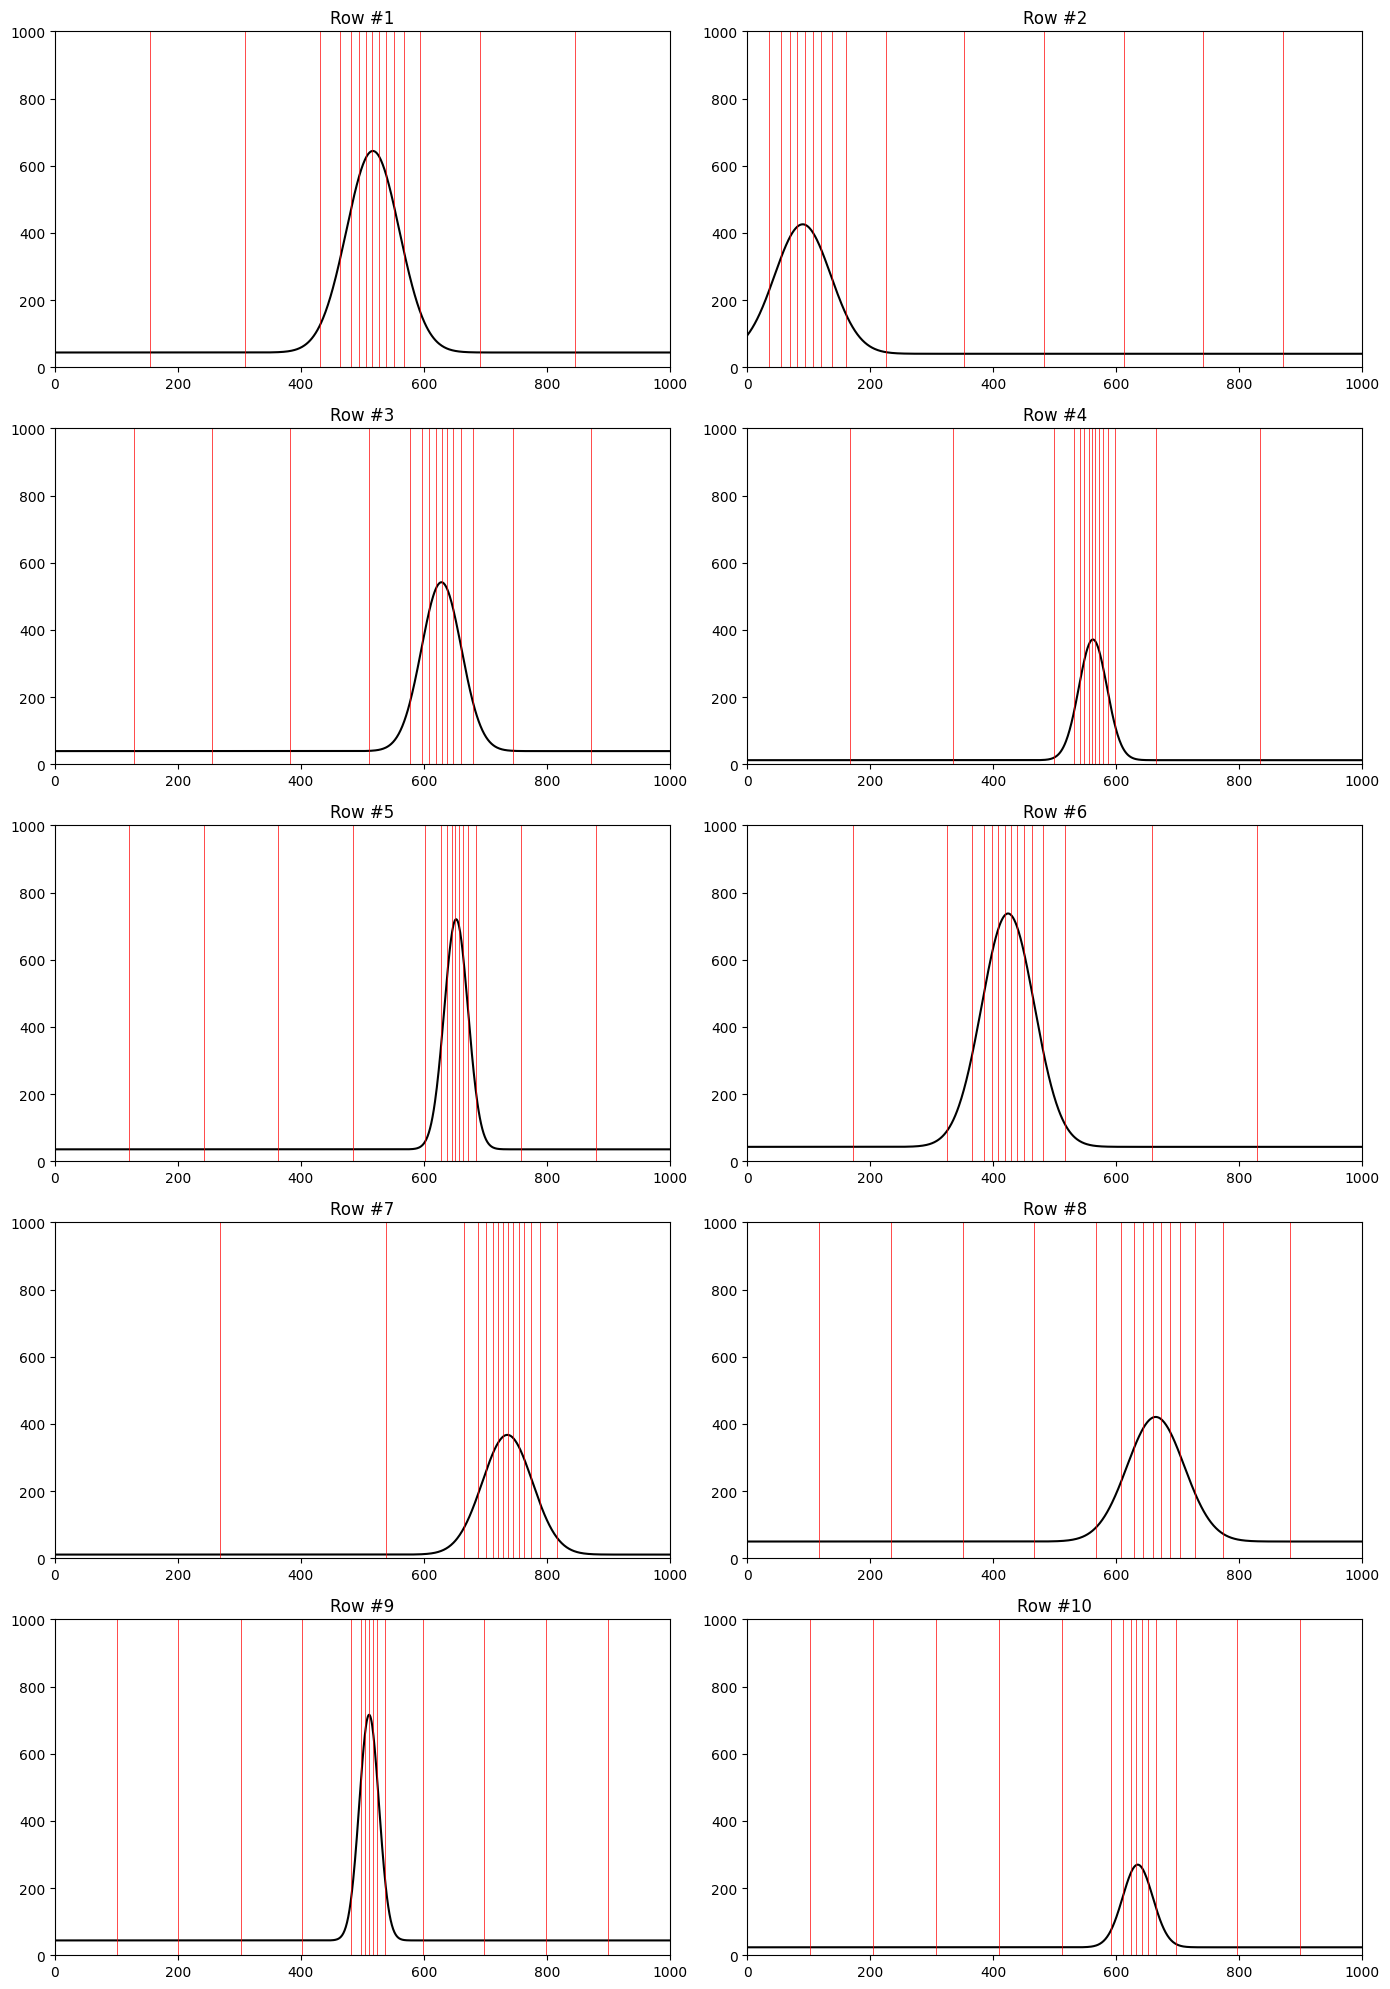

In [53]:
# graph stuff

# plot edh bins
def plot_edh_bins(bins, ax):
    for _bin in bins:
        ax.axvline(x=_bin, color='r', linewidth=.5)

# plot gaussian
def plot_gaussian(x, y, edh_bins, ax):
    ax.plot(x, y, 'k-')
    plot_edh_bins(edh_bins, ax)

graph_df = pd.read_pickle('data/ground-truth.pkl')
gauss_data_set, edh_bin_set = graph_df.data_pts, graph_df.edh_bds
fig, axes = plt.subplots(SAMPLES // 2, 2, figsize=(14, 20))
for i in df.index:
    y_set, edh_bins = gauss_data_set[i], edh_bin_set[i]
    r = i % SAMPLES // 2
    c = i % 2
    ax = axes[r][c]
    ax.set_xlim(0, RES)
    ax.set_ylim(0, RES)
    plot_gaussian(X_RANGE, y_set, edh_bins, ax)
    ax.title.set_text(f'Row #{i+1}')
fig.tight_layout()
plt.show()

# Data Processing

In [27]:
# New imports

from scipy.optimize import minimize, curve_fit
from utility.process import convert_ed

## Initial Guess

In [58]:
# Wrapper for gauss that covers known params (width & ambient)
# assumes hardcoded w & o values are obtained from a global var 'cur_row' that stores the current row in the dataframe

def gen_gauss_wrapper(x, h, d):
    return gen_gauss(x, h, d, row.width, row.ambient)

In [45]:
# Using curve_fit from scipy

def curve_fit_from_edh(edh_bds, w, o):
    pred_x, pred_y = convert_ed(edh_bds, edh_bds, RES, o) # TODO: change func params
    pred_h = max(pred_y)
    pred_d = RES / 2
    bounds = (0, RES)
    params, covars = curve_fit(gen_gauss_wrapper, pred_x, pred_y, p0=(pred_h, pred_d), bounds=bounds)
    return params

# Test w/ hardcoded gaussian

def test_curve_fit_from_edh():
    h, d = row.height, row.depth
    h_, d_ = curve_fit_from_edh(row.edh_bds, row.width, row.ambient)
    # TODO: output as dataframe
    print(f'Pred h: {h_} | True h: {h} | diff: {abs(h-h_)}')
    print(f'Pred d: {d_} | True d: {d} | diff: {abs(d-d_)}')
df = pd.read_pickle('data/ground-truth.pkl')
row = df.loc[0]
test_curve_fit_from_edh()

Pred h: 598.7848382982212 | True h: 600.0 | diff: 1.2151617017788112
Pred d: 517.2168378011081 | True d: 517.0 | diff: 0.21683780110811313


In [61]:
# Using narrowest-bin as initial depth, and average height as guess

def get_narrowest_bin_idx(edh_bds):
    diffs = list(np.diff(edh_bds))
    return diffs.index(min(diffs))

def guess_from_narrow_edh(edh_bds, w, o):
    idxs = tuple()
    idxs += (get_narrowest_bin_idx(edh_bds),)
    # get adjacent idx without going oob (probably a better way to do this but idc)
    if idxs[0] == len(edh_bds) - 1:
        idxs += (idxs[0] - 1,)
    else:
        idxs += (idxs[0] + 1,)
    pred_d = (edh_bds[idxs[0]] + edh_bds[idxs[1]]) / 2
    pred_h = sum(H_RANGE) / 2
    return (pred_h, pred_d)

# Test w/ hardcoded gaussian

def test_guess_from_narrow_edh():
    h, d = row.height, row.depth
    h_, d_ = guess_from_narrow_edh(row.edh_bds, row.width, row.ambient)
    # TODO: output as dataframe
    print(f'Pred h: {h_} | True h: {h} | diff: {abs(h-h_)}')
    print(f'Pred d: {d_} | True d: {d} | diff: {abs(d-d_)}')
df = pd.read_pickle('data/ground-truth.pkl')
row = df.loc[0]
test_guess_from_narrow_edh()

Pred h: 475.0 | True h: 600.0 | diff: 125.0
Pred d: 511.0 | True d: 517.0 | diff: 6.0


## Minimization

In [39]:
# Cost function for minimizer

def cost_func(unknowns, knowns, target):
    pred_h, pred_d = unknowns
    w, o = knowns
    pred = oracle_edh(gen_gauss(X_RANGE, pred_h, pred_d, w, o), BINS)
    return np.sum((pred - target) ** 2)

In [40]:
# Error functions

def pe(expected, predicted):
    return abs((predicted-expected) / expected)

def mse(expected, predicted):
    return np.sum((expected-predicted)**2) / predicted.size

In [63]:
# Major function that fully implements prediction process

def reconstruct_gauss(edh_bds, w, o, guess_model, minimizer_model):
    pred_h, pred_d = guess_model(edh_bds, w, o)
    optimize_result = minimize(cost_func, (pred_h, pred_d), args=((w, o), edh_bds), method=minimizer_model)
    return optimize_result.x

# Test w/ hardcoded gaussian

def test_reconstruct_gauss():
    h, d = row.height, row.depth
    h_, d_ = reconstruct_gauss(row.edh_bds, row.width, row.ambient, g_model, m_model)
    # TODO: output as dataframe
    print(f'Pred h: {h_} | True h: {h} | diff: {abs(h-h_)}')
    print(f'Pred d: {d_} | True d: {d} | diff: {abs(d-d_)}')
g_model = curve_fit_from_edh
m_model = 'nelder-mead'
df = pd.read_pickle('data/ground-truth.pkl')
row = df.loc[0]
test_reconstruct_gauss()

Pred h: 600.1560689746568 | True h: 600.0 | diff: 0.15606897465681868
Pred d: 517.1462404768222 | True d: 517.0 | diff: 0.14624047682218588


In [66]:
# Test that minimize doesn't freak out when true values are the predictions

def test_minimize_at_answ():
    h, d = row.height, row.depth
    h_, d_ = minimize(cost_func, (h, d), args=((w, o), edh_bds), method=m_model)
    # TODO: output as dataframe
    print(f'Pred h: {h_} | True h: {h} | diff: {abs(h-h_)}')
    print(f'Pred d: {d_} | True d: {d} | diff: {abs(d-d_)}')
m_model = 'nelder-mead'
df = pd.read_pickle('data/ground-truth.pkl')
row = df.loc[0]
test_reconstruct_gauss()

Pred h: 600.1560689746568 | True h: 600.0 | diff: 0.15606897465681868
Pred d: 517.1462404768222 | True d: 517.0 | diff: 0.14624047682218588


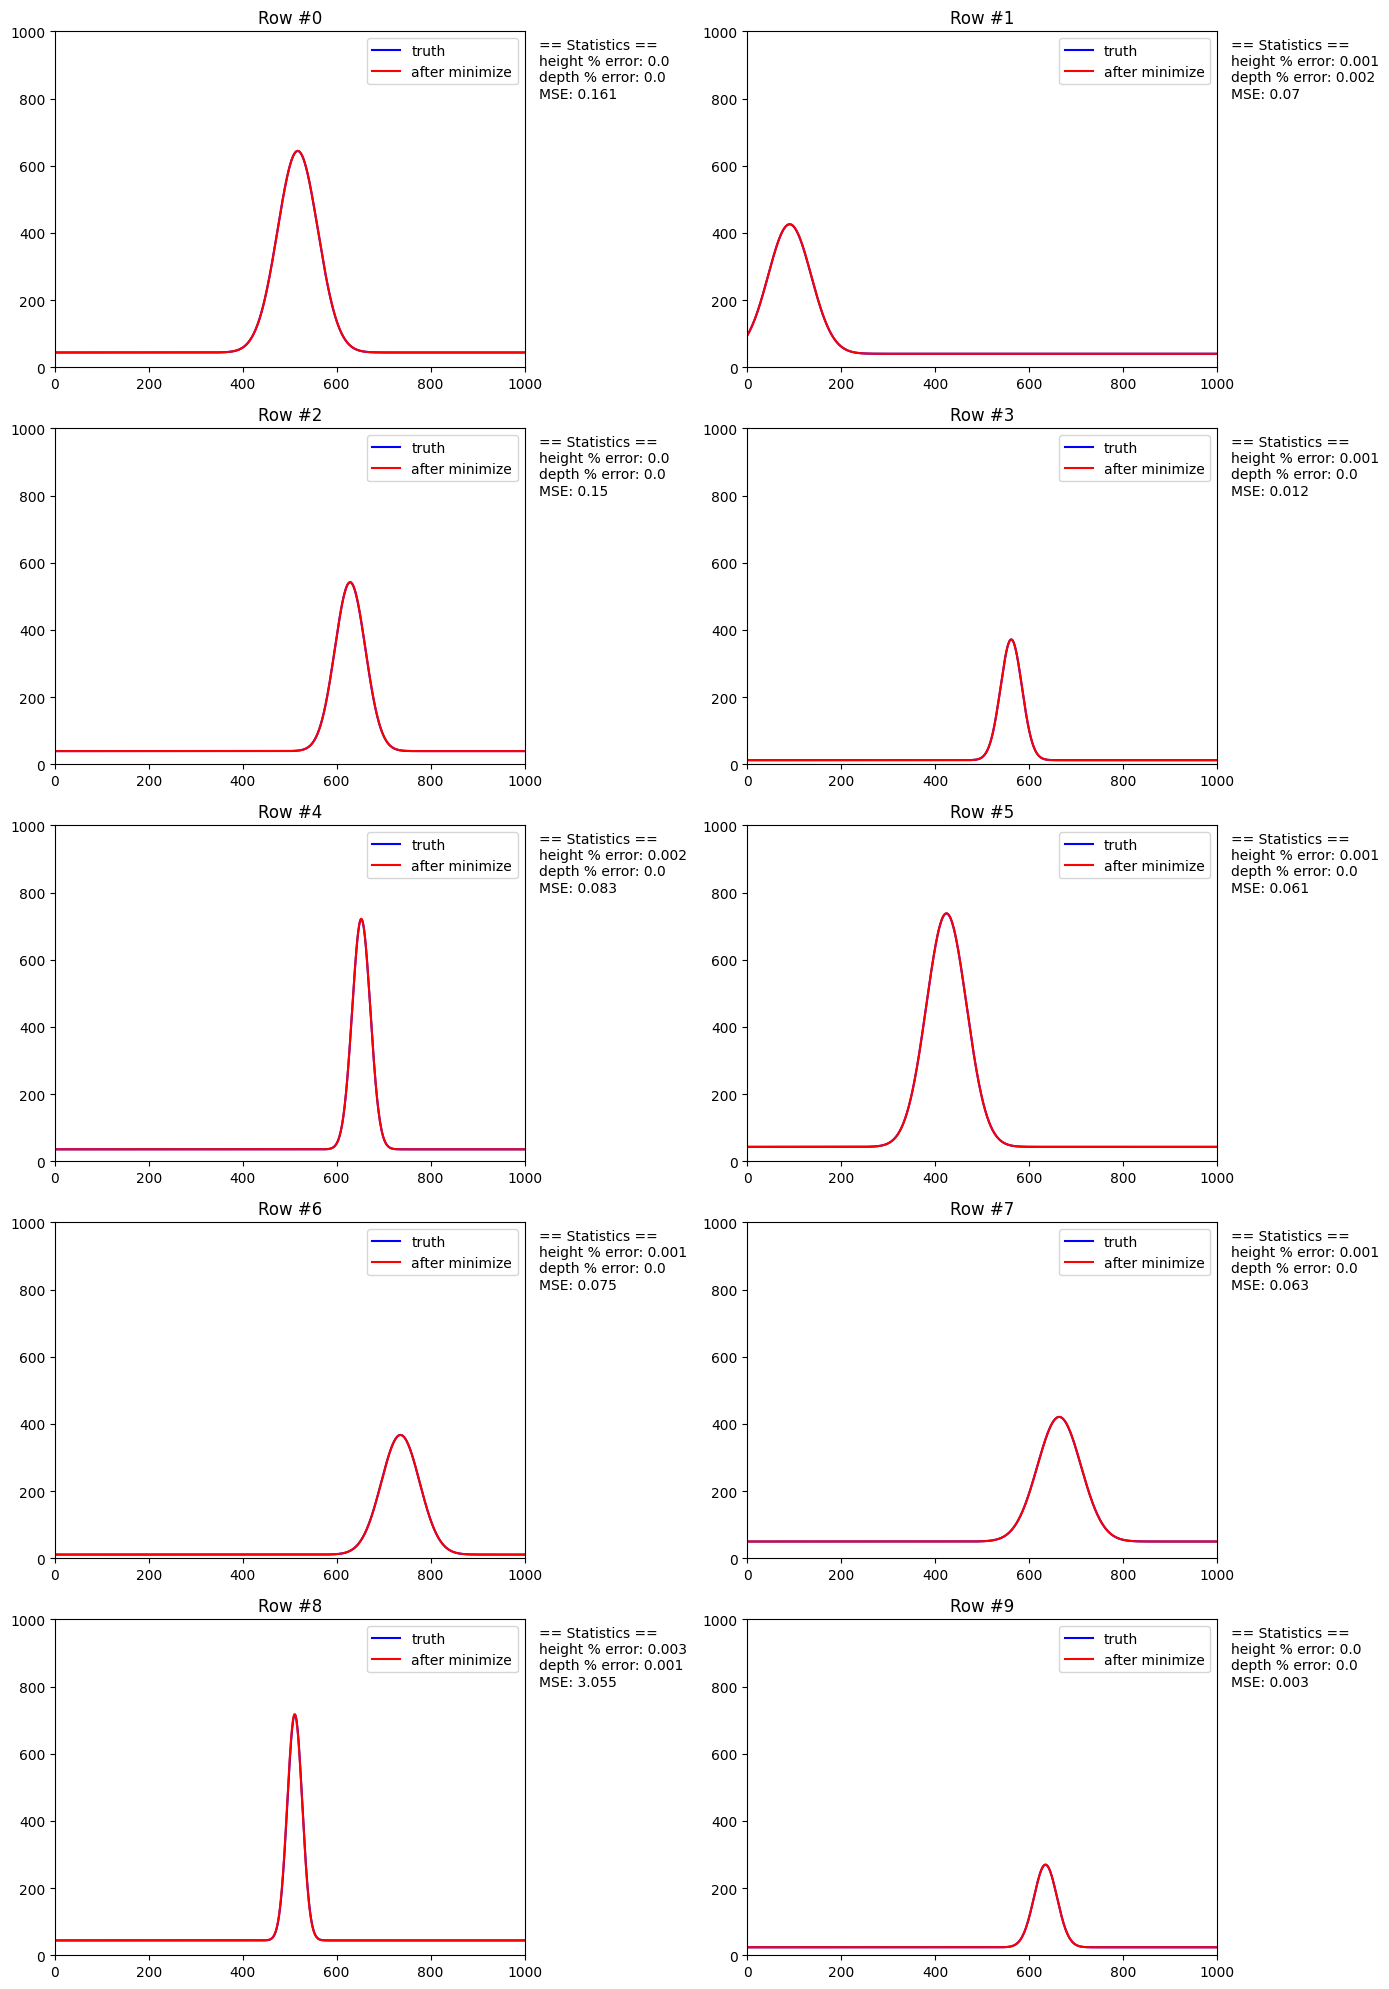

In [65]:
# Bulk testing

g_model = curve_fit_from_edh
m_model = 'nelder-mead'
df = pd.read_pickle('data/ground-truth.pkl')

fig, axes = plt.subplots(SAMPLES // 2, 2, figsize=(14, 20))
for i in df.index:
    global row
    row = df.loc[i]
    h, d, w, o = row.height, row.depth, row.width, row.ambient
    h_, d_ = reconstruct_gauss(row.edh_bds, w, o, g_model, m_model)
    pred_data_pts = gen_gauss(X_RANGE, h_, d_, w, o)
    pred_edh_bds = oracle_edh(pred_data_pts, BINS)

    r = i % SAMPLES // 2
    c = i % 2
    ax = axes[r][c]
    ax.set_xlim(0, RES)
    ax.set_ylim(0, RES)

    ax.plot(X_RANGE, row.data_pts, 'b-', label='truth')
    ax.plot(X_RANGE, pred_data_pts, 'r-', label='after minimize')

    description = '== Statistics ==\n'
    description += f'height % error: {round(pe(h, h_), 3)}\n'
    description += f'depth % error: {round(pe(d, d_), 3)}\n'
    description += f'MSE: {round(mse(row.data_pts, pred_data_pts), 3)}'
    ax.text(1.03, 0.98, description, transform=ax.transAxes, fontsize=10, verticalalignment='top')
    ax.title.set_text(f'Row #{i}')
    ax.legend()
fig.tight_layout()
plt.show()